In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

data = pd.read_csv('Dataset .csv')

In [6]:
#handles missing values by deleting them
rest=data.dropna()

In [7]:
rest.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                False
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

In [9]:
#DATA ANALYSIS
#analyzing the different features to know importance

#for table booking
ratings_by_booking=rest.groupby('Has Table booking')['Aggregate rating'].mean()
#print(ratings_by_booking)

<Axes: xlabel='Has Table booking'>

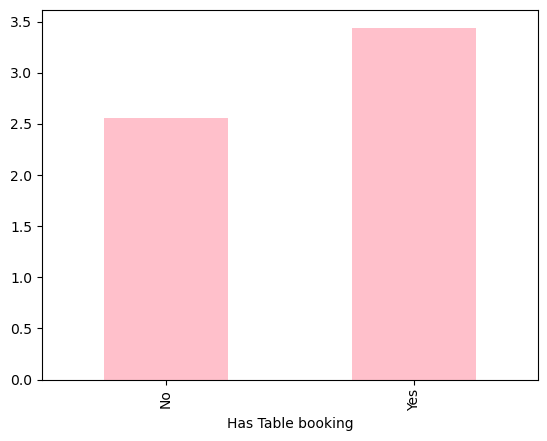

In [10]:
ratings_by_booking.plot(kind='bar',color='pink')

In [4]:
rest.City.value_counts()

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: count, Length: 140, dtype: int64

In [5]:
rest['Country Code'].value_counts()

Country Code
1      8652
216     429
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

In [6]:
rest['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     497
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     334
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

C:\Users\Nebolisa Kosiso\AppData\Local\Temp\ipykernel_12228\3986134454.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors=cm.get_cmap("tab10", len(ratings_by_city)).colors


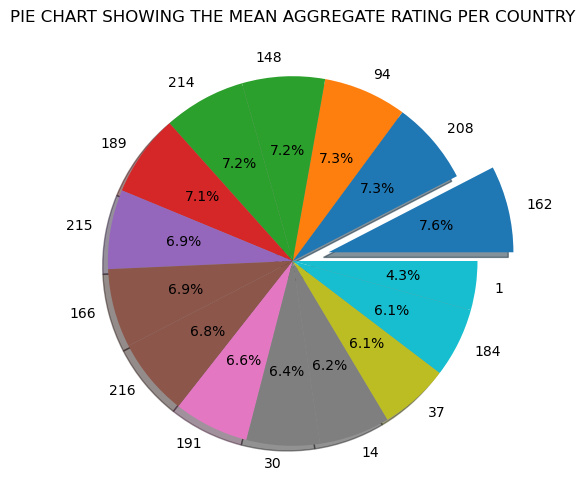

In [12]:
import matplotlib.cm as cm
#country with the highest aggregate rating
plt.figure(figsize = (10,6))
ratings_by_city=rest.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False)
labels=ratings_by_city.index

colors=cm.get_cmap("tab10", len(ratings_by_city)).colors
explode=[0.2] + [0] * (len(ratings_by_city) - 1)

plt.pie(ratings_by_city,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True)
plt.title("PIE CHART SHOWING THE MEAN AGGREGATE RATING PER COUNTRY")
plt.show()

In [44]:
ratings_by_city

Country Code
162    4.468182
208    4.300000
94     4.295238
148    4.262500
214    4.233333
189    4.210000
215    4.087500
166    4.060000
216    4.003963
191    3.870000
30     3.763333
14     3.658333
37     3.575000
184    3.575000
1      2.523324
Name: Aggregate rating, dtype: float64

INTERPRETATION
162 is Phillipines

<Axes: xlabel='Has Table booking', ylabel='Aggregate rating'>

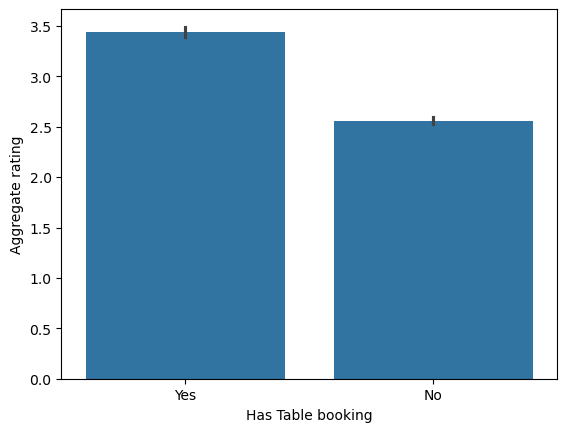

In [15]:
#analysis for table booking
sns.barplot(x='Has Table booking', y='Aggregate rating',data=rest)

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

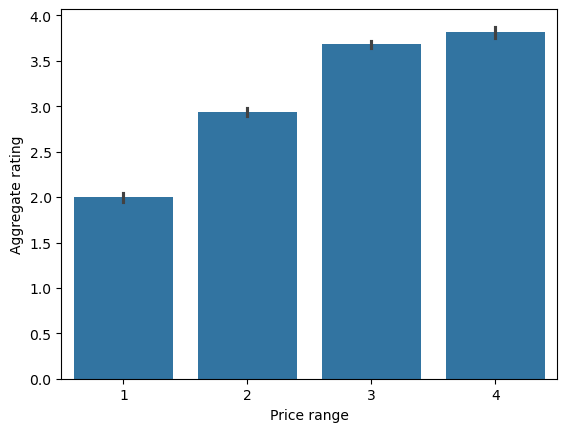

In [17]:
#for price range: mean aggregate rating against the price range
sns.barplot(x='Price range', y='Aggregate rating',data=rest)

In [ ]:
#average rating vs number of votes in each country
ratings_by_votes=rest.groupby('Country Code')['Votes'].count().sort_values(ascending=False)
plt.figure(figsize = (12,6))
sns.countplot(x=ratings_by_votes, hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

In [24]:
cuisines_data = rest['Cuisines']
cuisines_data = cuisines_data.apply(lambda x:x.lower().strip())
cuisines_count= []

for i in cuisines_data:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

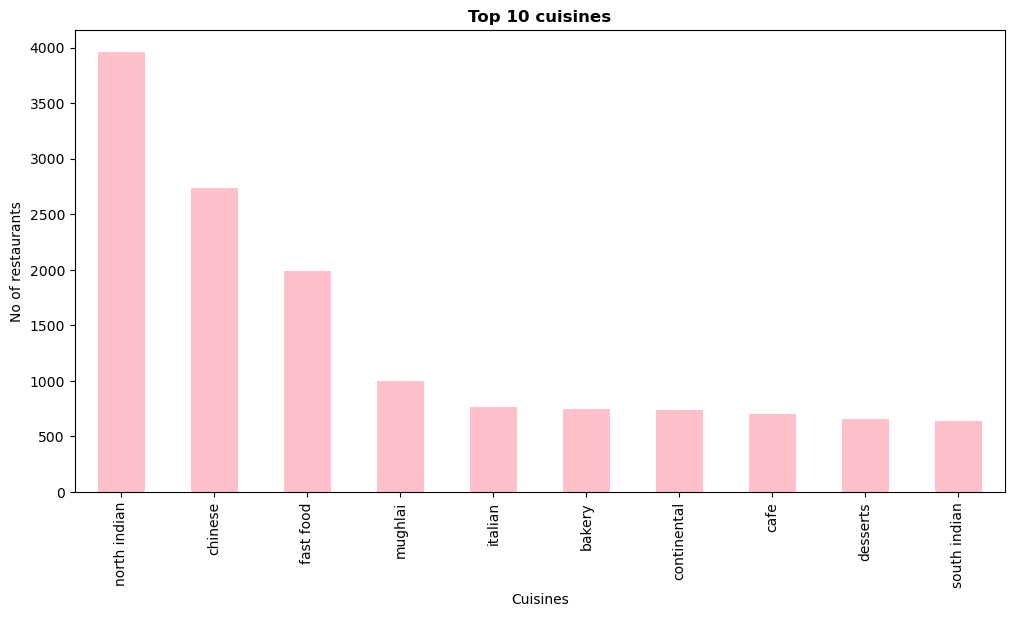

In [28]:
#popular cuisines in dataset

plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'pink')
plt.title('Top 10 cuisines',weight='bold')
plt.xlabel('Cuisines')
plt.ylabel('No of restaurants')
        


In [15]:
#popular cuisines
ratings_by_cuisines=rest.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(ratings_by_cuisines.head())

Cuisines
Hawaiian, Seafood                  4.9
Continental, Indian                4.9
Mexican, American, Healthy Food    4.9
American, Sandwich, Tea            4.9
European, German                   4.9
Name: Aggregate rating, dtype: float64


Text(0, 0.5, 'Aggregate rating')

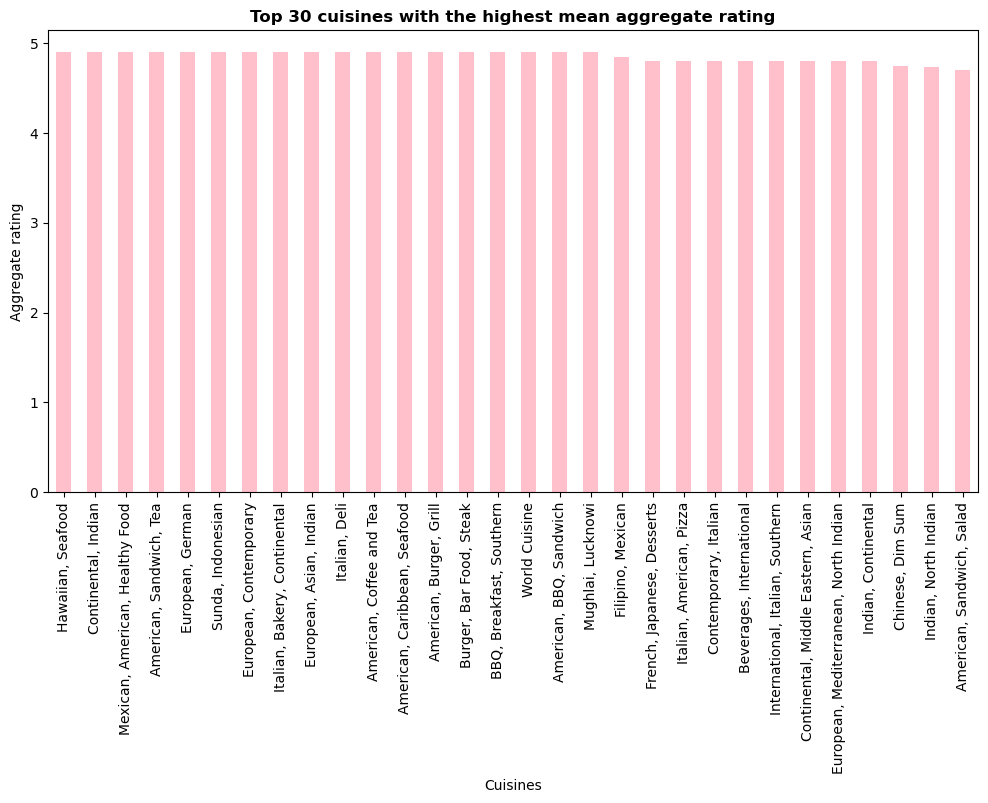

In [17]:
plt.figure(figsize=(12,6)) 
pd.Series(ratings_by_cuisines)[:30].plot(kind='bar',color= 'pink')
plt.title('Top 30 cuisines with the highest mean aggregate rating',weight='bold')
plt.xlabel('Cuisines')
plt.ylabel('Aggregate rating')

Text(0, 0.5, 'Aggregate rating')

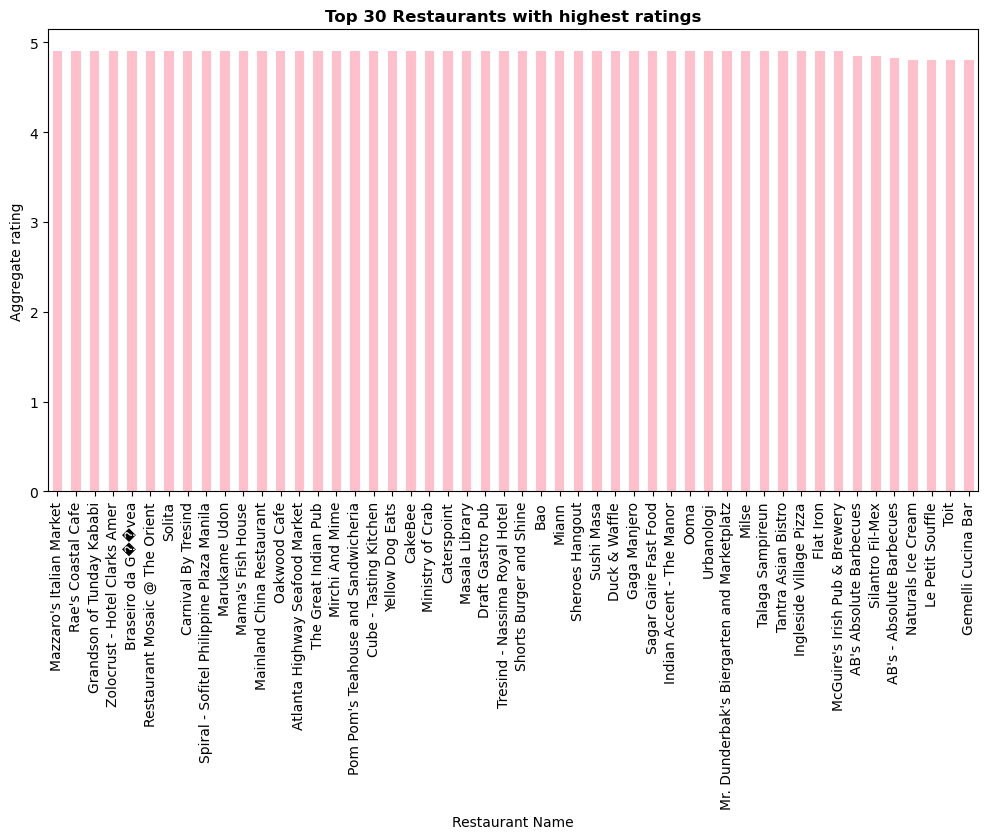

In [22]:
ratings_by_cuisines=rest.groupby('Restaurant Name')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6)) 
pd.Series(ratings_by_cuisines)[:50].plot(kind='bar',color= 'pink')
plt.title('Top 30 Restaurants with highest ratings',weight='bold')
plt.xlabel('Restaurant Name')
plt.ylabel('Aggregate rating')

In [25]:
ratings=pd.DataFrame(rest.groupby(['Restaurant Name', 'Aggregate rating','Country Code'])['Votes'].mean().sort_values(ascending=False))
ratings.head(10)

,,,Votes
Restaurant Name,Aggregate rating,Country Code,
Toit,4.8,1,10934.0
Truffles,4.7,1,9667.0
Hauz Khas Social,4.3,1,7931.0
Peter Cat,4.3,1,7574.0
AB's - Absolute Barbecues,4.6,1,6907.0
Big Brewsky,4.5,1,5705.0
The Black Pearl,4.1,1,5385.0
BarBQ,4.2,1,5288.0
Saravana Bhavan,4.3,1,5172.0


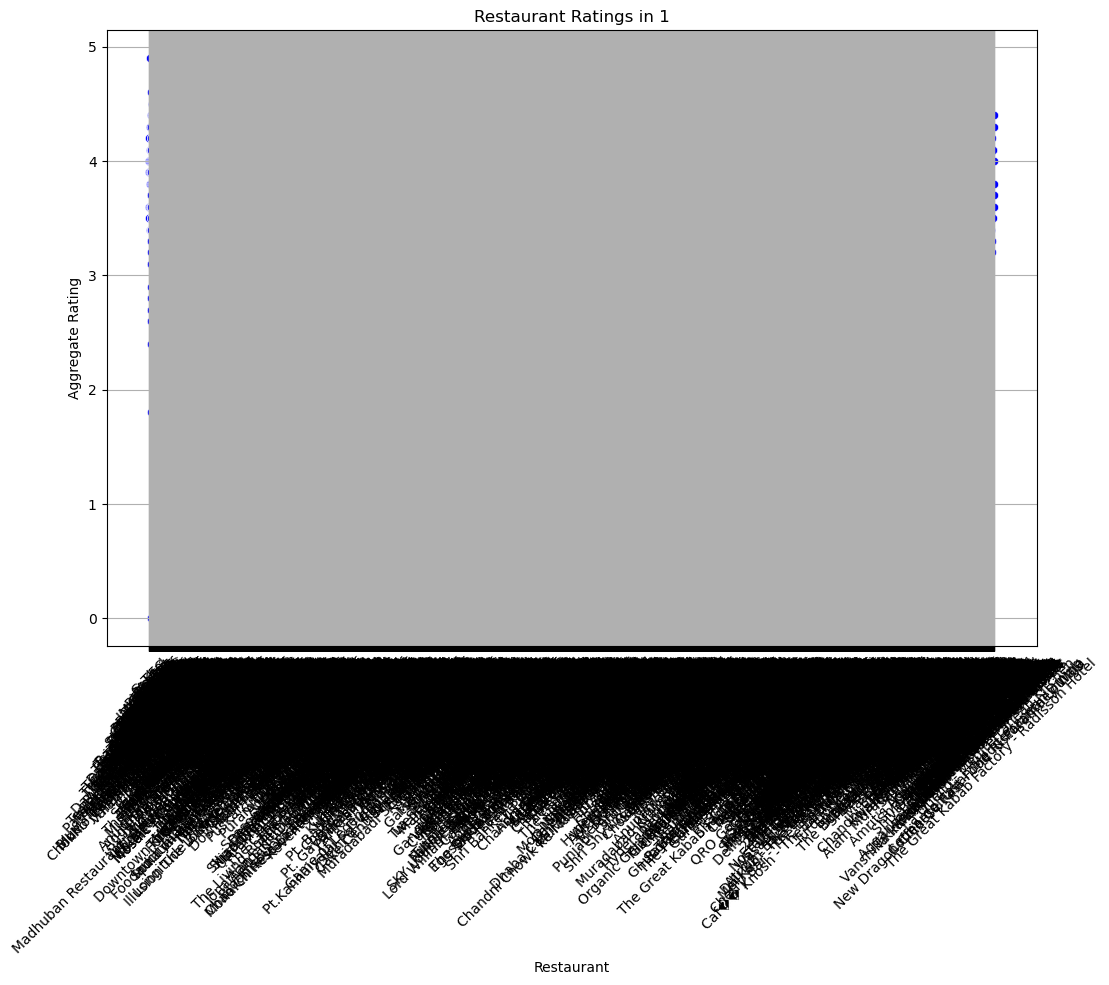

In [31]:
country_code = 1
df_country = rest[rest['Country Code'] == country_code]
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_country, x='Restaurant Name',y='Aggregate rating', color='blue')
plt.xlabel("Restaurant")
plt.ylabel("Aggregate Rating")
plt.title(f"Restaurant Ratings in {country_code}")
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

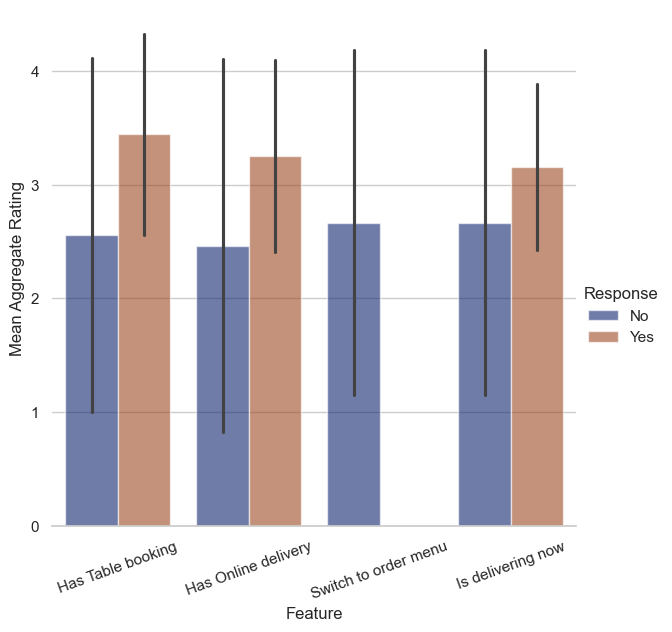

In [43]:


#obtaining the mean aggregate rating for the YES/NO categorical features
sns.set_theme(style="whitegrid")

# Defining categorical Yes/No columns
columns = ["Has Table booking", "Has Online delivery", "Switch to order menu", "Is delivering now"]

# Melt the DataFrame to long format
rest_melted = rest.melt(id_vars=["Aggregate rating"], value_vars=columns, 
                        var_name="Feature", value_name="Response")

# Ensure "Response" is categorical
rest_melted["Response"] = rest_melted["Response"].astype("category")

# Create the bar plot
g = sns.catplot(
    data=rest_melted, kind="bar",
    x="Feature", y="Aggregate rating", hue="Response",
    estimator=lambda x: x.mean(),  # Ensure mean aggregation
    errorbar="sd", palette="dark", alpha=.6, height=6
)

g.despine(left=True)
g.set_axis_labels("Feature", "Mean Aggregate Rating")
g.legend.set_title("Response")

# Rotating x-axis labels for better readability
plt.xticks(rotation=20)
plt.show()


In [50]:

#now get rid of glaring unnecessary features
rest = rest.drop(columns=['Restaurant ID','Restaurant Name','Address','Locality','Locality Verbose','Longitude','Latitude','Rating color','Rating text'])

In [51]:
rest.head(5)

,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,314
1,162,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,591
2,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,270
3,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,365
4,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,229


In [ ]:
##DATA PREPROCESSING
#

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')

In [57]:
encodertransform = encoder.fit_transform(rest[['Country Code','Currency','Has Table booking','Has Online delivery','Switch to order menu']])

In [58]:
rest = pd.concat([rest, encodertransform], axis=1).drop(columns = ['Country Code','Currency','Has Table booking','Has Online delivery','Switch to order menu'])

In [59]:
rest.head(5)

,City,Cuisines,Average Cost for two,Is delivering now,Price range,Aggregate rating,Votes,Country Code_1,Country Code_14,Country Code_30,...,Currency_Pounds(��),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Switch to order menu_No
0,Makati City,"French, Japanese, Desserts",1100,No,3,4.8,314,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,Makati City,Japanese,1200,No,3,4.5,591,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,No,4,4.4,270,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,Mandaluyong City,"Japanese, Sushi",1500,No,4,4.9,365,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,Mandaluyong City,"Japanese, Korean",1500,No,4,4.8,229,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [61]:
#encode city using label encoder
from sklearn.preprocessing import LabelEncoder

city_encoder = LabelEncoder()
rest['City'] = city_encoder.fit_transform(rest['City'])


In [62]:
rest.head(5)

,City,Cuisines,Average Cost for two,Is delivering now,Price range,Aggregate rating,Votes,Country Code_1,Country Code_14,Country Code_30,...,Currency_Pounds(��),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Switch to order menu_No
0,73,"French, Japanese, Desserts",1100,No,3,4.8,314,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,73,Japanese,1200,No,3,4.5,591,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,75,"Seafood, Asian, Filipino, Indian",4000,No,4,4.4,270,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,75,"Japanese, Sushi",1500,No,4,4.9,365,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,75,"Japanese, Korean",1500,No,4,4.8,229,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [63]:
#encode cuisines using multiple label binarizer
from sklearn.preprocessing import MultiLabelBinarizer
rest['Cuisines'] = rest['Cuisines'].apply(lambda x: x.split(", "))

In [65]:
mlb = MultiLabelBinarizer()
cuisine_encoded = mlb.fit_transform(rest['Cuisines'])
cuisine_encoded_data = pd.DataFrame(cuisine_encoded, columns=mlb.classes_)
rest = pd.concat([rest, cuisine_encoded_data], axis=1)


In [66]:
rest.head(5)

,City,Cuisines,Average Cost for two,Is delivering now,Price range,Aggregate rating,Votes,Country Code_1,Country Code_14,Country Code_30,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,73.0,"[French, Japanese, Desserts]",1100.0,No,3.0,4.8,314.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73.0,[Japanese],1200.0,No,3.0,4.5,591.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.0,"[Seafood, Asian, Filipino, Indian]",4000.0,No,4.0,4.4,270.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75.0,"[Japanese, Sushi]",1500.0,No,4.0,4.9,365.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75.0,"[Japanese, Korean]",1500.0,No,4.0,4.8,229.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
rest=rest.drop(columns="Cuisines")

In [68]:
rest

,City,Average Cost for two,Is delivering now,Price range,Aggregate rating,Votes,Country Code_1,Country Code_14,Country Code_30,Country Code_37,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,73.0,1100.0,No,3.0,4.8,314.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73.0,1200.0,No,3.0,4.5,591.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.0,4000.0,No,4.0,4.4,270.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75.0,1500.0,No,4.0,4.9,365.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75.0,1500.0,No,4.0,4.8,229.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
rest=rest.dropna()

In [70]:
rest

,City,Average Cost for two,Is delivering now,Price range,Aggregate rating,Votes,Country Code_1,Country Code_14,Country Code_30,Country Code_37,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,73.0,1100.0,No,3.0,4.8,314.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73.0,1200.0,No,3.0,4.5,591.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.0,4000.0,No,4.0,4.4,270.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75.0,1500.0,No,4.0,4.9,365.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75.0,1500.0,No,4.0,4.8,229.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9541,139.0,75.0,No,3.0,4.2,877.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9542,139.0,80.0,No,3.0,3.7,506.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9543,139.0,35.0,No,2.0,4.5,761.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9544,139.0,40.0,No,2.0,4.7,1305.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#dropped is delivering now
rest=rest.drop(columns="Is delivering now")

In [72]:
rest

,City,Average Cost for two,Price range,Aggregate rating,Votes,Country Code_1,Country Code_14,Country Code_30,Country Code_37,Country Code_94,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,73.0,1100.0,3.0,4.8,314.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73.0,1200.0,3.0,4.5,591.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.0,4000.0,4.0,4.4,270.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75.0,1500.0,4.0,4.9,365.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75.0,1500.0,4.0,4.8,229.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9541,139.0,75.0,3.0,4.2,877.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9542,139.0,80.0,3.0,3.7,506.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9543,139.0,35.0,2.0,4.5,761.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9544,139.0,40.0,2.0,4.7,1305.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#using XGBoost
!pip install xgboost

In [73]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [74]:
#define x and y
x = rest.drop("Aggregate rating", axis=1)
y = rest["Aggregate rating"]
    

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [77]:
models={
    "XGBoost Regressor":XGBRegressor()
}
#try different models always
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

In [82]:
mean_squared_error(y_test,y_pred)
print('MSE for model is', r2)

MSE for model is 0.946261384149926


In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('r2 score for model is', r2)

r2 score for model is 0.946261384149926
